In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import tensorflow as tf
import tensorflow_hub as hub

def load_image_byte(path):
    with open(path, "rb") as f:
        return f.read()

model_vila = hub.load('https://tfhub.dev/google/vila/image/1')

model_musiq = hub.load('https://www.kaggle.com/models/google/musiq/TensorFlow2/ava/1')

2024-08-27 15:36:43.432397: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79031 MB memory:  -> device: 0, name: NVIDIA A800 80GB PCIe, pci bus id: 0000:b5:00.0, compute capability: 8.0


In [28]:
image_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/svd-train/inputs/image2010_006414.jpg"
image_bytes = load_image_byte(image_path)

In [14]:
predict_fn = model_vila.signatures['serving_default']
predictions = predict_fn(tf.constant(image_bytes))
aesthetic_score = predictions['predictions']


In [29]:
predict_fn = model_musiq.signatures['serving_default']
aesthetic_score = predict_fn(tf.constant(image_bytes))

In [30]:
aesthetic_score

{'output_0': <tf.Tensor: shape=(), dtype=float32, numpy=4.801528>}

In [162]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
import numpy as np

selected_model = 'ava' #@param ['spaq', 'koniq', 'paq2piq', 'ava']

NAME_TO_HANDLE = {
    # # Model trained on SPAQ dataset: https://github.com/h4nwei/SPAQ
    # 'spaq': 'https://tfhub.dev/google/musiq/spaq/1',

    # # Model trained on KonIQ-10K dataset: http://database.mmsp-kn.de/koniq-10k-database.html
    # 'koniq': 'https://tfhub.dev/google/musiq/koniq-10k/1',

    # # Model trained on PaQ2PiQ dataset: https://github.com/baidut/PaQ-2-PiQ
    # 'paq2piq': 'https://tfhub.dev/google/musiq/paq2piq/1',

    # # Model trained on AVA dataset: https://ieeexplore.ieee.org/document/6247954

    # 'musiq': 'https://github.com/google-research/google-research/tree/master/musiq'
    'ava': 'https://tfhub.dev/google/musiq/ava/1',

    # 'vila': 'https://github.com/google-research/google-research/tree/master/vila'
    'vila': 'https://tfhub.dev/google/vila/image/1'
}

model_handle = NAME_TO_HANDLE[selected_model]
model = hub.load(model_handle)
predict_fn = model.signatures['serving_default']

print(f'loaded model {selected_model} ({model_handle})')


loaded model ava (https://tfhub.dev/google/musiq/ava/1)


In [164]:
OUTPUT_KEYS = {
    'vila':"predictions",
    'ava': "output_0"
}
output_key = OUTPUT_KEYS[selected_model]

In [99]:

def load_image_from_url(img_url):
  """Returns an image with shape [1, height, width, num_channels]."""
  user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
  response = requests.get(img_url, headers=user_agent)
  image_bytes = BytesIO(response.content)
  image = Image.open(image_bytes)
  return image, response.content

def load_image_byte(path):
    with open(path, "rb") as f:
        return f.read()

def show_image(image, title=''):
  image_size = image.size
  plt.imshow(image)
  plt.axis('on')
  plt.title(title)
  plt.show()
     

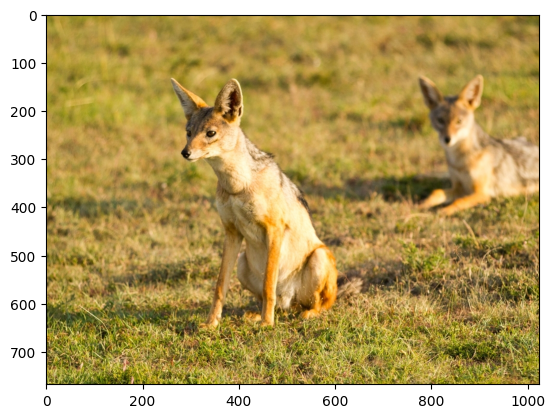

In [105]:
os.environ["http_proxy"]="http://127.0.0.1:7890"
os.environ["https_proxy"]="http://127.0.0.1:7890"

image_url = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgr0DKaAoO6qTrJo3hXP8UM3D4AB8gQeNI22Q2QphBVGgn-5v84tjhH3ZWTlGtlUoPdlcx54dM93Qi04MuN7eBbj9WlT8Qxy6B2Us4kcn_53FH28MnTtGCzMPhjCVGIgXRL8ZEMeO-7iue7sNEGxBtgx2bI-eKDQAondM8Dfjb1FaybFgUQji4UU9-0vQ/s1024/image9.png' #@param {type: 'string'}

image, image_bytes = load_image_from_url(image_url)

show_image(image)


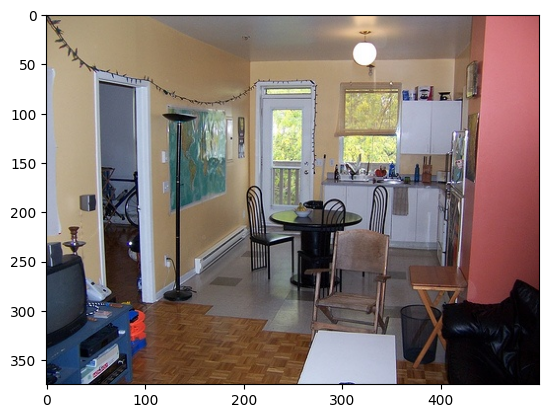

In [102]:


image_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/svd-train/inputs/room.jpg"
image_bytes = load_image_byte(image_path)
image = Image.open(BytesIO(image_bytes))
show_image(image)

In [159]:
import json
dataset_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/PascalVOC/VOC2012/hed-safe/val_dataset.json"
# dataset_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/open-images/Human_body/openpose/val_dataset.json"
val_dataset = json.load(open(dataset_path))
# 
# generate_image_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/open-images/Human_body/images"
generate_image_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/svd-train/output_final/output_depth_lora_joint_gray_rank64_nta_cf_only_image_loss/eval"
# generate_image_path = "/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/data/PascalVOC/VOC2012/JPEGImages"
generate_image_paths = [os.path.join(generate_image_path, line['file_name']) for line in val_dataset]
fake_images_bytes = [load_image_byte(path) for path in generate_image_paths]

In [165]:
MOS_predictions = []
for image_bytes in fake_images_bytes:
    prediction = predict_fn(tf.constant(image_bytes))
    pred_value = prediction[output_key].numpy()
    if isinstance(pred_value, np.ndarray):
        pred_value = pred_value.item()
    MOS_predictions.append(pred_value)
# print("predicted MOS: ", prediction)

In [166]:
result = sum(MOS_predictions) / len(MOS_predictions)
result

4.390455562114716

4.6479802970886235

In [1]:
import sys
# sys.path.append("data/deps/ControlNet")
sys.path.append("/home/bml/storage/mnt/v-95c5b44cfcff4e6c/org/data_lxr/Marigold")

from src.util import metric
from src.util.alignment import (
    align_depth_least_square,
    depth2disparity,
    disparity2depth,
)

In [ ]:
depth_pred = np.clip(depth_pred, a_min=1e-6, a_max=None)